### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/resnet50" --epochs 10 --arch resnet50 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

/usr/bin/python3: Error while finding module specification for 'src.train' (ModuleNotFoundError: No module named 'src')


### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet50/best_resnet50.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.94      0.93       237
   PNEUMONIA       0.98      0.97      0.98       669

    accuracy                           0.96       906
   macro avg       0.95      0.96      0.95       906
weighted avg       0.96      0.96      0.96       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9952
  PR-AUC: 0.9983
  Specificity>=0.90: thr=0.265 sens=0.993 spec=0.903 prec=0.967
  Best F1: thr=0.343 sens=0.990 spec=0.924 prec=0.974 f1=0.981
Confusion matrix:
[[222  15]
 [ 17 652]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria


In [ ]:
from IPython.display import Image

In [ ]:
pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet50/best_resnet50.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_1.png" --arch "resnet50"


Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_1.png. Pred class id: 1


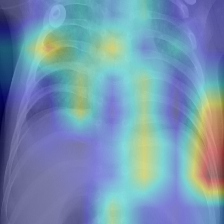

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:
pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet50/best_resnet50.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_2.png" --arch "resnet50"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_2.png. Pred class id: 1


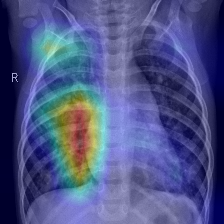

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_2.png')

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet50/best_resnet50.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_noraml_1.png" --arch "resnet50"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_noraml_1.png. Pred class id: 0


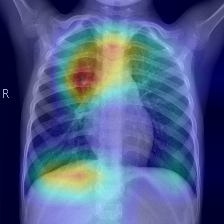

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_noraml_1.png')

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/resnet50/best_resnet50.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="resnet50", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 24,624,066
